This is an image captioning project using 8k Flickr dataset and CNN-RNN (encoder-decoder) model.

First lets visualize a sample image of the Flickr 8K dataset. There are 8000 more images in the same dataset. The dataset is split into three parts i.e. training data, testing data and validation data.

Training data contains 6000 images
Validation and testing data contains close to 1000 images each.
For each image, there are five alternate captions provided in the dataset. 

For building a prediction model, we use CNN-RNN model. For CNN, we use VGG-16 (pretrained) model. For RNN, we use LSTM cells.

# 1. Visualizing an image


In [2]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('dataset/imgData/403523132_73b9a1a4b3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# 2. VGG-16 Model

Running a CNN-RNN model is computationally expensive. AN alternative is to extract all the features and save it in a .pkl file. In my case I am using a pretrainedVGG model (pretrained). The output vector contains 1000 nodes in VGG-16. However we will be using the last layer (excluding output layer) for extracting features from images (4096 nodes). We extract the feature vector for each image and the save the vales of 4096 nodes for each image id in the csv file

Before that let us visualize the results of the above sample image using VGG-16. We load a pretained VGG-16 model from keras. It also provides preproces_input which is useful to normalize images according to VGG-16. Furthermore, we use decode_predictions to understand the output of VGG-16 model

In [4]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
import cv2
from keras.applications.vgg16 import preprocess_input
import numpy as np
from imutils import paths

import string
import csv

def extract_features(image_path):
    model = VGG16()
    img = cv2.imread(image_path)
    
    img = cv2.resize(img,(224,224),interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = np.asarray(img)
    img = img.reshape((1,img.shape[0],img.shape[1],img.shape[2]))
    img = img.astype('float64')
    img = preprocess_input(img)
    yhat = model.predict(img)
    label = decode_predictions(yhat)
    print(label)
      
    
extract_features('dataset/imgData/403523132_73b9a1a4b3.jpg')

[[('n02093754', 'Border_terrier', 0.6078026), ('n04409515', 'tennis_ball', 0.069570005), ('n02113624', 'toy_poodle', 0.03213389), ('n02091467', 'Norwegian_elkhound', 0.0222655), ('n02113712', 'miniature_poodle', 0.019859089)]]


# 3. Feature Extraction
The above result shows different predictions for objects in the image with probabitiies. According to the result, Border Terrier and Tennis Ball are the most likely objects in the given image. 

Now, we need to save extracted features for each image in the csv file (Please note that we are not using the second last layer but the dense layer with 4096 nodes). The summary of the VGG model is printed.

In [4]:
def extract_features(image_path,writer,model):
    id = image_path.split('/')[-1].split('.')[0]
    
   
    
    img = cv2.imread(image_path)
    
    img = cv2.resize(img,(224,224),interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = np.asarray(img)
    img = img.reshape((1,img.shape[0],img.shape[1],img.shape[2]))
    img = img.astype('float64')
    img = preprocess_input(img)
    results = model.predict(img)
    result  = list(results[0])
    result.insert(0,id)
    writer.writerows([result])
    
model = VGG16()
model.layers.pop()
print(model.summary())
model = Model(inputs = model.inputs, outputs = model.layers[-1].output)    
myFile = open('dataset/imgData/features.csv', 'w', newline='')
writer = csv.writer(myFile)
path = 'dataset/imgData/'
imagePaths = list(paths.list_images(path))
for (i,imagePath) in enumerate(imagePaths):
    print("Image " + str(i) + ' of ' + str(len(imagePaths)) + ' -- Preprocessed and extracted')
    extract_features(imagePath,writer,model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Image 106 of 8091 -- Preprocessed and extracted
Image 107 of 8091 -- Preprocessed and extracted
Image 108 of 8091 -- Preprocessed and extracted
Image 109 of 8091 -- Preprocessed and extracted
Image 110 of 8091 -- Preprocessed and extracted
Image 111 of 8091 -- Preprocessed and extracted
Image 112 of 8091 -- Preprocessed and extracted
Image 113 of 8091 -- Preprocessed and extracted
Image 114 of 8091 -- Preprocessed and extracted
Image 115 of 8091 -- Preprocessed and extracted
Image 116 of 8091 -- Preprocessed and extracted
Image 117 of 8091 -- Preprocessed and extracted
Image 118 of 8091 -- Preprocessed and extracted
Image 119 of 8091 -- Preprocessed and extracted
Image 120 of 8091 -- Preprocessed and extracted
Image 121 of 8091 -- Preprocessed and extracted
Image 122 of 8091 -- Preprocessed and extracted
Image 123 of 8091 -- Preprocessed and extracted
Image 124 of 8091 -- Preprocessed and extracted
Image 125 of 8091 -- Preprocessed and extracted
Image 126 of 8091 -- Preprocessed and ex

Image 277 of 8091 -- Preprocessed and extracted
Image 278 of 8091 -- Preprocessed and extracted
Image 279 of 8091 -- Preprocessed and extracted
Image 280 of 8091 -- Preprocessed and extracted
Image 281 of 8091 -- Preprocessed and extracted
Image 282 of 8091 -- Preprocessed and extracted
Image 283 of 8091 -- Preprocessed and extracted
Image 284 of 8091 -- Preprocessed and extracted
Image 285 of 8091 -- Preprocessed and extracted
Image 286 of 8091 -- Preprocessed and extracted
Image 287 of 8091 -- Preprocessed and extracted
Image 288 of 8091 -- Preprocessed and extracted
Image 289 of 8091 -- Preprocessed and extracted
Image 290 of 8091 -- Preprocessed and extracted
Image 291 of 8091 -- Preprocessed and extracted
Image 292 of 8091 -- Preprocessed and extracted
Image 293 of 8091 -- Preprocessed and extracted
Image 294 of 8091 -- Preprocessed and extracted
Image 295 of 8091 -- Preprocessed and extracted
Image 296 of 8091 -- Preprocessed and extracted
Image 297 of 8091 -- Preprocessed and ex

Image 448 of 8091 -- Preprocessed and extracted
Image 449 of 8091 -- Preprocessed and extracted
Image 450 of 8091 -- Preprocessed and extracted
Image 451 of 8091 -- Preprocessed and extracted
Image 452 of 8091 -- Preprocessed and extracted
Image 453 of 8091 -- Preprocessed and extracted
Image 454 of 8091 -- Preprocessed and extracted
Image 455 of 8091 -- Preprocessed and extracted
Image 456 of 8091 -- Preprocessed and extracted
Image 457 of 8091 -- Preprocessed and extracted
Image 458 of 8091 -- Preprocessed and extracted
Image 459 of 8091 -- Preprocessed and extracted
Image 460 of 8091 -- Preprocessed and extracted
Image 461 of 8091 -- Preprocessed and extracted
Image 462 of 8091 -- Preprocessed and extracted
Image 463 of 8091 -- Preprocessed and extracted
Image 464 of 8091 -- Preprocessed and extracted
Image 465 of 8091 -- Preprocessed and extracted
Image 466 of 8091 -- Preprocessed and extracted
Image 467 of 8091 -- Preprocessed and extracted
Image 468 of 8091 -- Preprocessed and ex

Image 619 of 8091 -- Preprocessed and extracted
Image 620 of 8091 -- Preprocessed and extracted
Image 621 of 8091 -- Preprocessed and extracted
Image 622 of 8091 -- Preprocessed and extracted
Image 623 of 8091 -- Preprocessed and extracted
Image 624 of 8091 -- Preprocessed and extracted
Image 625 of 8091 -- Preprocessed and extracted
Image 626 of 8091 -- Preprocessed and extracted
Image 627 of 8091 -- Preprocessed and extracted
Image 628 of 8091 -- Preprocessed and extracted
Image 629 of 8091 -- Preprocessed and extracted
Image 630 of 8091 -- Preprocessed and extracted
Image 631 of 8091 -- Preprocessed and extracted
Image 632 of 8091 -- Preprocessed and extracted
Image 633 of 8091 -- Preprocessed and extracted
Image 634 of 8091 -- Preprocessed and extracted
Image 635 of 8091 -- Preprocessed and extracted
Image 636 of 8091 -- Preprocessed and extracted
Image 637 of 8091 -- Preprocessed and extracted
Image 638 of 8091 -- Preprocessed and extracted
Image 639 of 8091 -- Preprocessed and ex

Image 790 of 8091 -- Preprocessed and extracted
Image 791 of 8091 -- Preprocessed and extracted
Image 792 of 8091 -- Preprocessed and extracted
Image 793 of 8091 -- Preprocessed and extracted
Image 794 of 8091 -- Preprocessed and extracted
Image 795 of 8091 -- Preprocessed and extracted
Image 796 of 8091 -- Preprocessed and extracted
Image 797 of 8091 -- Preprocessed and extracted
Image 798 of 8091 -- Preprocessed and extracted
Image 799 of 8091 -- Preprocessed and extracted
Image 800 of 8091 -- Preprocessed and extracted
Image 801 of 8091 -- Preprocessed and extracted
Image 802 of 8091 -- Preprocessed and extracted
Image 803 of 8091 -- Preprocessed and extracted
Image 804 of 8091 -- Preprocessed and extracted
Image 805 of 8091 -- Preprocessed and extracted
Image 806 of 8091 -- Preprocessed and extracted
Image 807 of 8091 -- Preprocessed and extracted
Image 808 of 8091 -- Preprocessed and extracted
Image 809 of 8091 -- Preprocessed and extracted
Image 810 of 8091 -- Preprocessed and ex

Image 961 of 8091 -- Preprocessed and extracted
Image 962 of 8091 -- Preprocessed and extracted
Image 963 of 8091 -- Preprocessed and extracted
Image 964 of 8091 -- Preprocessed and extracted
Image 965 of 8091 -- Preprocessed and extracted
Image 966 of 8091 -- Preprocessed and extracted
Image 967 of 8091 -- Preprocessed and extracted
Image 968 of 8091 -- Preprocessed and extracted
Image 969 of 8091 -- Preprocessed and extracted
Image 970 of 8091 -- Preprocessed and extracted
Image 971 of 8091 -- Preprocessed and extracted
Image 972 of 8091 -- Preprocessed and extracted
Image 973 of 8091 -- Preprocessed and extracted
Image 974 of 8091 -- Preprocessed and extracted
Image 975 of 8091 -- Preprocessed and extracted
Image 976 of 8091 -- Preprocessed and extracted
Image 977 of 8091 -- Preprocessed and extracted
Image 978 of 8091 -- Preprocessed and extracted
Image 979 of 8091 -- Preprocessed and extracted
Image 980 of 8091 -- Preprocessed and extracted
Image 981 of 8091 -- Preprocessed and ex

Image 1129 of 8091 -- Preprocessed and extracted
Image 1130 of 8091 -- Preprocessed and extracted
Image 1131 of 8091 -- Preprocessed and extracted
Image 1132 of 8091 -- Preprocessed and extracted
Image 1133 of 8091 -- Preprocessed and extracted
Image 1134 of 8091 -- Preprocessed and extracted
Image 1135 of 8091 -- Preprocessed and extracted
Image 1136 of 8091 -- Preprocessed and extracted


KeyboardInterrupt: 

Full results not shown. However running the code saves all the extracted features in a csv file (around 183 MB).


# 4. Cleaning Descriptions
Next lets deal with the description of the images. The description are saved in Flickr.token.txt file. For each description, we clean the description and save it in a csv file with a corresponding image id.

For cleaning the description we use the following steps.
* Removing punctuations
* Remove numeric or alphanumeric words
* Removing words with less than 1 character (it removes some most used words such as 'a' but such words do not compromise with the meanining of the sentence)

After cleaning of the data, we find the voacbulary size and number of image descriptions. We can see that each image has 5 descriptions. We will visualize that later


In [5]:
with open('dataset/textData/Flickr8k.token.txt', 'r') as file:
    content = file.read()
    
    
lines = content.split('\n')
describe = []
count_words = set()
image_count = set()

for line in lines: 
    split_line = line.split()
    im_id = split_line[0]
    desc = line.replace(im_id,'')
    desc = desc.strip()
    
    #clean description
    desc = desc.lower()
    desc = desc.translate(str.maketrans("","", string.punctuation))
    words = desc.split(' ')
    words = [word for word in words if not len(word)<2]
    words = [word for word in words if word.isalpha()]
    count_words.update(words)
    desc = ' '.join(words).strip()
  
    im_id = im_id.split('.')[0]    
    describe.append([im_id,desc])
    image_count.add(im_id)


with open('dataset/textData/clean_vocab.csv', 'w', newline='') as myFile:
    writer = csv.writer(myFile)
    writer.writerows(describe)


print('Vocabulary Size = ' + str(len(count_words)))
print('Number of images = ' + str(len(image_count)))
print('No. of descriptions = ' + str(len(describe)))


Vocabulary Size = 8763
Number of images = 8092
No. of descriptions = 40460


# 5. Load Descriptions

We create a function to load image ids provided a filename (filename for training, testing or validation set). We can use these image ids further to load image features and image descriptions from the csv file that we have saved previously. While loading description we use token words such as startq and endq which is used to create a sequence and feed it to lstm cells

In [12]:
def load_identifiers(filename):
    with open(filename, 'r') as file:
        content = file.read()
        dataset = []
        for line in content.split('\n'):
            if len(line)>0:
                im_id = line.split('.')[0]
                dataset.append(im_id)
    return list(set(dataset))  

In [13]:
def load_descriptions(filename,dataset):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        description_dict = {}
        for row in reader:
            im_id = row[0]
            description = row[1]
            if im_id in dataset:
                if im_id not in description_dict:
                    description_dict[im_id] = []
                description = 'startq ' + description + ' endq'
                description_dict[im_id].append(description)
        return description_dict
    
            
            

# 6. Visualize Image Descriptions

startq black dog emerges from the water onto the sand holding white object in its mouth endq
startq black dog emerges from the water with white ball in its mouth endq
startq black dog on beach carrying ball in its mouth endq
startq black dog walking out of the water with white ball in his mouth endq
startq the black dog jumps out of the water with something in its mouth endq


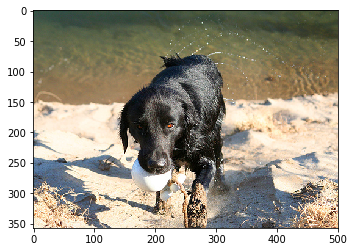

In [18]:
filename = 'dataset/textData/Flickr_8k.testImages.txt'
test = load_identifiers(filename)
test_desc = load_descriptions('dataset/textData/clean_vocab.csv',test)

img = cv2.imread('dataset/imgData/280706862_14c30d734a.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

for i in test_desc['280706862_14c30d734a']:
    print (i)

# 6. Extract Image Features from CSV File

In [20]:
def load_image_features(filename,dataset):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        image_features = {}

        i=0
        for row in reader:
            i= i+1
            #print(i)
            features = row[1:]
            features = [float(i) for i in features]
            im_id = row[0]
            #print(im_id)
            if im_id in dataset:
                image_features[im_id] = features
        return image_features

# 7. Creating Sequence from Descriptions

In [28]:
# create a list of descriptions instead of dictionary

def to_lines(descriptions):
    descriptions_list = []
    for key in descriptions:
        for value in descriptions[key]:
            descriptions_list.append(value)
    return descriptions_list
        

A tokenizer is used to tokenize descriptions. First let us understand how CNN- RNN model works. Suppose we have a picture of a man feeding his baby. The caption to be generated for this photo is 'man is feeding his baby. Now the inputs and outputs of an image caption generator wrks in the following way

#### ----- Input 1----------Input 2----------Output
* Photo----------startq-----------man
* Photo----------man--------------is
* Photo----------is---------------feeding
* Photo----------feeding----------his
* Photo----------his--------------baby
* Photo----------baby-------------endq

Tokenizer and other keras utilities do the following things
* Assign a unique id for each word in the library
* Create sequences of descriptions using word ids
* Padding on descriptions so that each input has the same length regardless of word count in the descriptions. Each sequence has the length which is equal to the longest description in the training dataset. We find te max_length description below.
* Convert the output word to a categorical one-hot-encoded vector where the length of vector is equal to the vocabulary size. If the value of any element is close to 1 in the output vector, then it indicates the corresponding next word.


In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from numpy import array

def tokenize(descriptions):
    all_lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(all_lines)
    return tokenizer

In [30]:
def create_sequences(tokenizer, max_length, descriptions, photos):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)

In [31]:
def find_max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# 8. Defining Model

In [32]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import add
from keras.layers import RepeatVector
from keras.callbacks import ModelCheckpoint

# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(4096,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(128, activation='relu')(fe1)
	fe3 = RepeatVector(max_length)(fe2)
    
    
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 128, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256, return_sequences=True)(se2)
	se4 = TimeDistributed(Dense(128))(se3)
    
    
	# decoder model
	decoder1 = add([fe3, se4])
	decoder2 = LSTM(1000, return_sequences=False)(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
    
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
	# summarize model
	print(model.summary())
    
	return model

# 9. Preprocessing training Dataset

In [33]:
train= load_identifiers('dataset/textData/Flickr_8k.trainImages.txt')
print('Training dataset size = ' + str(len(train)) + ' images')
train_desc = load_descriptions('dataset/textData/clean_vocab.csv',train)
print('Total Descriptions = ' + str(len(train_desc)) + ' descriptions')
train_features = load_image_features('features.csv',train)
print('Total image featureset loaded = ' + str(len(train_features)))

tokenizer = tokenize(train_desc)
vocab_size = len(tokenizer.word_index) + 1

max_length_train = find_max_length(train_desc)
X1train, X2train, ytrain = create_sequences(tokenizer, max_length_train, train_desc, train_features)

Training dataset size = 6000 images
Total Descriptions = 6000 descriptions
Total image featureset loaded = 6000


# 10. Preprocessing Validation Dataset

In [34]:
filename = 'dataset/textData/Flickr_8k.devImages.txt'
test = load_identifiers(filename)
print('Testing dataset size = ' + str(len((test))))
test_desc = load_descriptions('dataset/textData/clean_vocab.csv',test)
print('Test Descriptions = ' + str(len(test_desc)) + ' descriptions')
test_features = load_image_features('features.csv',test)
print('Total test images featureset loaded = ' + str(len(test_features)))
max_length_test = find_max_length(train_desc)
X1test, X2test, ytest = create_sequences(tokenizer, max_length_train, test_desc, test_features)

Testing dataset size = 1000
Test Descriptions = 1000 descriptions
Total test images featureset loaded = 1000


In [24]:
model = define_model(vocab_size, max_length_train)
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit([X1train, X2train], ytrain, epochs=20, batch_size=512, verbose=1, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 34)           0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 34, 128)      970112      input_10[0][0]                   
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 4096)         0           input_9[0][0]                    
__________________________________________________________________________________________________
dropout_9 

KeyboardInterrupt: 

The training is stopped after 7 epochs due to overfitting...
We evaluate the training results in evaluate_model.ipynb